```markdown
# Cluster-Based Academic Recommendation System
```

In schools and universities, recommending academic resources is often difficult because there is no clear understanding of department courses, required skills, gained skills, and professors expertise. This can lead to poor resource suggestions and less effective learning. A recommendation system using clustering can solve this by matching students with the right resources based on their needs and goals. Project Added Value • Personalized recommendations improve students learning experience. • Optimized use of academic resources reduces waste. • Data insights help administrators make better decisions. • Aligns required and gained skills for academic success. Required Work Part N°1: Machine Learning ( Cluster-Based recommendation system )


```markdown
## Project Overview

This project involves analyzing and clustering academic data to gain insights into various departments and courses. The workflow includes the following steps:

1. **Import Libraries**: Necessary libraries such as pandas, numpy, scikit-learn, matplotlib, etc., are imported for data manipulation, visualization, and machine learning tasks.

2. **Load Datasets**: Academic and department datasets are loaded from CSV files.

3. **Data Cleaning and Standardization**: Column names are cleaned and standardized for consistency. Missing values are handled appropriately, and special characters in department names are addressed.

4. **Data Merging**: The academic and department datasets are merged on a common column to create a comprehensive dataset.

5. **Feature Engineering**: Required and gained skills are combined, and text features are encoded using TF-IDF. Categorical columns are also encoded.

6. **Dimensionality Reduction**: PCA is applied to reduce the dimensionality of numerical features for visualization purposes.

7. **Clustering**: Various clustering algorithms (KMeans, Agglomerative Clustering, DBSCAN, Gaussian Mixture) are applied to the data. Clusters are evaluated using metrics such as Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index.

8. **Model Saving and Visualization**: Clustering models are saved, and clusters are visualized using scatter plots.

The goal of this project is to identify patterns and group similar courses and departments, which can help in making informed decisions and improving academic offerings.
```

In [1]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Load datasets

In [3]:
academic_df = pd.read_csv("./data/academic.csv")
academic_df.head()

,SchoolDepartment,ProjectTitle,Finish Time,Email,RequiredSkill,Professors,GainedSkill,strartingOrAsgnmtDate,Hour
0,Quality Assurance and Risk Mgmt,Add Documents to 2020 Core Committee Page,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,Quality Assurance and Risk Mgmt,White River High School Election Video,NaN,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,NaN,04-03-2019,07:56:00 PM
2,Quality Assurance and Risk Manag,Pet License Roster Web Edits,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,Quality Assurance and Risk Manag,FJC Shred Event Flyer,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,Quality Assurance & Risk Management,Create Artwork for new Large Dropboxes,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,NaN,11-03-2019,15:38:00


In [4]:
department_df = pd.read_csv("./data/department.csv")
department_df.head()

,name,description,department_code,created_date,phone_number,email
0,Quality Assurance and Risk Management,department that is responsible for ensuring th...,dept_01JD8RJE3NTQPR3J6FGQ27DZ9Y,1968-12-28 09:24:59,2126442882953,wgaunter0@meetup.com
1,Technical Communication and Media,department that teaches you how to communicate...,dept_01JD8RJE3XDXME60264HHEEP5X,1929-05-29 14:51:03,2121135897138,wadshede1@feedburner.com
2,Engineering Leadership and Strategy,department that is responsible for the develop...,dept_01JD8RJE3YZMB79PYNABBQDE9V,1937-03-30 22:13:39,2123731667078,ovanderbeken2@jigsy.com
3,Academic Affairs and Staff Development,department that is responsible for the academi...,dept_01JD8RJE3ZVC8A59TW7Q5PQ3K1,1971-06-04 00:51:39,2124593511982,kdoxsey3@qq.com
4,Environmental and Civil Engineering,department that is responsible for the design ...,dept_01JD8RJE40JJA5J75GDEJAJW5R,1920-12-08 09:16:51,2127308767779,fassiter4@nytimes.com


### Clean and Standardize column names

In [5]:
academic_df.columns = academic_df.columns.str.lower().str.replace(' ', '_')
department_df.columns = department_df.columns.str.lower().str.replace(' ', '_')

In [6]:
academic_df.head()

,schooldepartment,projecttitle,finish_time,email,requiredskill,professors,gainedskill,strartingorasgnmtdate,hour
0,Quality Assurance and Risk Mgmt,Add Documents to 2020 Core Committee Page,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,Quality Assurance and Risk Mgmt,White River High School Election Video,NaN,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,NaN,04-03-2019,07:56:00 PM
2,Quality Assurance and Risk Manag,Pet License Roster Web Edits,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,Quality Assurance and Risk Manag,FJC Shred Event Flyer,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,Quality Assurance & Risk Management,Create Artwork for new Large Dropboxes,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,NaN,11-03-2019,15:38:00


In [7]:
# since we got a non understandable column name we rename some specific columns
academic_df.rename(columns={'schooldepartment': 'school_department'}, inplace=True)
academic_df.rename(columns={'coursetitle': 'course_title'}, inplace=True)
academic_df.rename(columns={'requiredskill': 'required_skill'}, inplace=True)
academic_df.rename(columns={'gainedskill': 'gained_skill'}, inplace=True)
academic_df.rename(columns={'strartingorasgnmtdate': 'starting_or_assignment_date'}, inplace=True)

In [8]:
academic_df.head()

,school_department,projecttitle,finish_time,email,required_skill,professors,gained_skill,starting_or_assignment_date,hour
0,Quality Assurance and Risk Mgmt,Add Documents to 2020 Core Committee Page,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,Quality Assurance and Risk Mgmt,White River High School Election Video,NaN,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,NaN,04-03-2019,07:56:00 PM
2,Quality Assurance and Risk Manag,Pet License Roster Web Edits,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,Quality Assurance and Risk Manag,FJC Shred Event Flyer,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,Quality Assurance & Risk Management,Create Artwork for new Large Dropboxes,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,NaN,11-03-2019,15:38:00


In [9]:
department_df.head()

,name,description,department_code,created_date,phone_number,email
0,Quality Assurance and Risk Management,department that is responsible for ensuring th...,dept_01JD8RJE3NTQPR3J6FGQ27DZ9Y,1968-12-28 09:24:59,2126442882953,wgaunter0@meetup.com
1,Technical Communication and Media,department that teaches you how to communicate...,dept_01JD8RJE3XDXME60264HHEEP5X,1929-05-29 14:51:03,2121135897138,wadshede1@feedburner.com
2,Engineering Leadership and Strategy,department that is responsible for the develop...,dept_01JD8RJE3YZMB79PYNABBQDE9V,1937-03-30 22:13:39,2123731667078,ovanderbeken2@jigsy.com
3,Academic Affairs and Staff Development,department that is responsible for the academi...,dept_01JD8RJE3ZVC8A59TW7Q5PQ3K1,1971-06-04 00:51:39,2124593511982,kdoxsey3@qq.com
4,Environmental and Civil Engineering,department that is responsible for the design ...,dept_01JD8RJE40JJA5J75GDEJAJW5R,1920-12-08 09:16:51,2127308767779,fassiter4@nytimes.com


### Handle Missing Values

In [10]:
### Let's check first how much missed values are in our dataframes
print("\nMissing values in Academic Dataset:")
print(academic_df.isnull().sum())
print("\nMissing values in Department Dataset:")
print(department_df.isnull().sum())


Missing values in Academic Dataset:
school_department                 1
projecttitle                      2
finish_time                    2139
email                             0
required_skill                   87
professors                        6
gained_skill                    121
starting_or_assignment_date       0
hour                              0
dtype: int64

Missing values in Department Dataset:
name               0
description        0
department_code    0
created_date       0
phone_number       0
email              0
dtype: int64


In [11]:
academic_df

,school_department,projecttitle,finish_time,email,required_skill,professors,gained_skill,starting_or_assignment_date,hour
0,Quality Assurance and Risk Mgmt,Add Documents to 2020 Core Committee Page,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,Quality Assurance and Risk Mgmt,White River High School Election Video,NaN,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,NaN,04-03-2019,07:56:00 PM
2,Quality Assurance and Risk Manag,Pet License Roster Web Edits,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,Quality Assurance and Risk Manag,FJC Shred Event Flyer,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,Quality Assurance & Risk Management,Create Artwork for new Large Dropboxes,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,NaN,11-03-2019,15:38:00
...,...,...,...,...,...,...,...,...,...
2134,NaN,NaN,NaN,unvalid,NaN,NaN,NaN,2020-12-10,09:08:00 PM
2135,Financal Engineering,Tyler Award Submission,NaN,unvalid,NaN,NaN,NaN,2021-01-15,08:13:00 PM
2136,Urban Planning and Public Infra,Stormwater Manual Update,NaN,unvalid,Website Programming,NaN,NaN,2021-02-17,23:21:00
2137,Urban Planning & Public Infrastructure,Stormwater Manual Update,NaN,unvalid,Website Programming,NaN,NaN,2021-02-17,11:25:00 PM


In [12]:
# Impute missing 'hour' column in academic_df
academic_df['hour'] = academic_df['hour'].fillna('00:00:00')

# Fill missing values in other columns by 'unknown'
academic_df.fillna('unknown', inplace=True)
academic_df.fillna('unknown', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_21940\3353867262.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  academic_df.fillna('unknown', inplace=True)


In [13]:
print("\nMissing values in Academic Dataset:")
print(academic_df.isnull().sum())
print("\nMissing values in Department Dataset:")
print(department_df.isnull().sum())
# As we can see we removed successfully all NaN values


Missing values in Academic Dataset:
school_department              0
projecttitle                   0
finish_time                    0
email                          0
required_skill                 0
professors                     0
gained_skill                   0
starting_or_assignment_date    0
hour                           0
dtype: int64

Missing values in Department Dataset:
name               0
description        0
department_code    0
created_date       0
phone_number       0
email              0
dtype: int64


In [14]:
# Standardize department names by making everything in lower case
academic_df['school_department'] = academic_df['school_department'].str.lower().str.strip()
department_df['name'] = department_df['name'].str.lower().str.strip()

# Handle special characters in department name like that & become "and"
academic_df['school_department'] = academic_df['school_department'].str.replace('&', 'and')
academic_df[:1]


,school_department,projecttitle,finish_time,email,required_skill,professors,gained_skill,starting_or_assignment_date,hour
0,quality assurance and risk mgmt,Add Documents to 2020 Core Committee Page,unknown,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM


In [15]:
academic_df

,school_department,projecttitle,finish_time,email,required_skill,professors,gained_skill,starting_or_assignment_date,hour
0,quality assurance and risk mgmt,Add Documents to 2020 Core Committee Page,unknown,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,quality assurance and risk mgmt,White River High School Election Video,unknown,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,unknown,04-03-2019,07:56:00 PM
2,quality assurance and risk manag,Pet License Roster Web Edits,unknown,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,quality assurance and risk manag,FJC Shred Event Flyer,unknown,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,quality assurance and risk management,Create Artwork for new Large Dropboxes,unknown,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,unknown,11-03-2019,15:38:00
...,...,...,...,...,...,...,...,...,...
2134,unknown,unknown,unknown,unvalid,unknown,unknown,unknown,2020-12-10,09:08:00 PM
2135,financal engineering,Tyler Award Submission,unknown,unvalid,unknown,unknown,unknown,2021-01-15,08:13:00 PM
2136,urban planning and public infra,Stormwater Manual Update,unknown,unvalid,Website Programming,unknown,unknown,2021-02-17,23:21:00
2137,urban planning and public infrastructure,Stormwater Manual Update,unknown,unvalid,Website Programming,unknown,unknown,2021-02-17,11:25:00 PM


In [16]:
# Merge datasets on a common column "school_department"
merged_df = pd.merge(academic_df, department_df, left_on='school_department', right_on='name', how='inner')
merged_df.head()

,school_department,projecttitle,finish_time,email_x,required_skill,professors,gained_skill,starting_or_assignment_date,hour,name,description,department_code,created_date,phone_number,email_y
0,quality assurance and risk management,Create Artwork for new Large Dropboxes,unknown,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,unknown,11-03-2019,15:38:00,quality assurance and risk management,department that is responsible for ensuring th...,dept_01JD8RJE3NTQPR3J6FGQ27DZ9Y,1968-12-28 09:24:59,2126442882953,wgaunter0@meetup.com
1,quality assurance and risk management,Redesign Election Inserts,unknown,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Graphic Design, Proofreading and Quality Assur...",15-03-2019,07:26:00 PM,quality assurance and risk management,department that is responsible for ensuring th...,dept_01JD8RJE3NTQPR3J6FGQ27DZ9Y,1968-12-28 09:24:59,2126442882953,wgaunter0@meetup.com
2,quality assurance and risk management,Kennel Brochure,unknown,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Graphic Design, Proofreading and Quality Assur...",2019-03-15,07:40:00 PM,quality assurance and risk management,department that is responsible for ensuring th...,dept_01JD8RJE3NTQPR3J6FGQ27DZ9Y,1968-12-28 09:24:59,2126442882953,wgaunter0@meetup.com
3,academic affairs and staff development,LinkedIn Learning employee video,unknown,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,Video Editing and Production,26-03-2019,10:07:00 PM,academic affairs and staff development,department that is responsible for the academi...,dept_01JD8RJE3ZVC8A59TW7Q5PQ3K1,1971-06-04 00:51:39,2124593511982,kdoxsey3@qq.com
4,technical communication and media,Social Planning,unknown,kfoulstone0@instagram.com,Social Media Strategy,Fatima Zahra El Idrissi,Social Media Strategy,2019-04-16,07:04:00 PM,technical communication and media,department that teaches you how to communicate...,dept_01JD8RJE3XDXME60264HHEEP5X,1929-05-29 14:51:03,2121135897138,wadshede1@feedburner.com


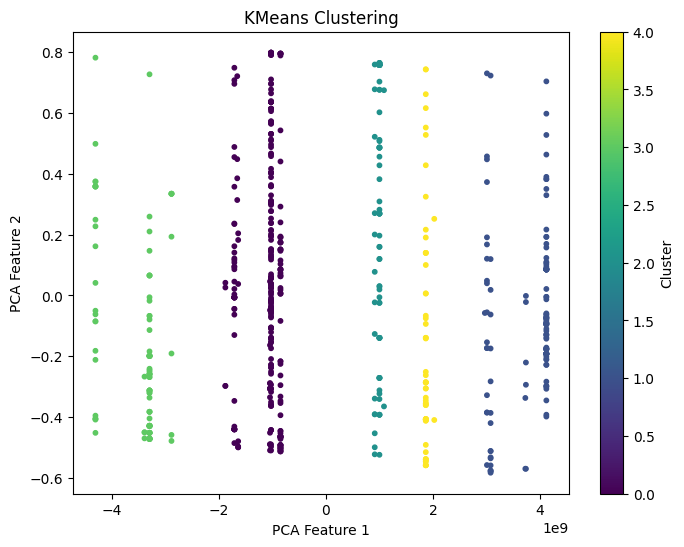

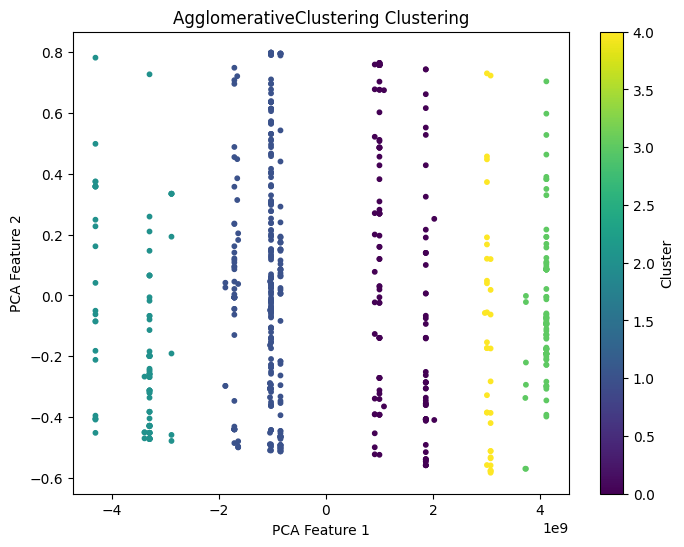

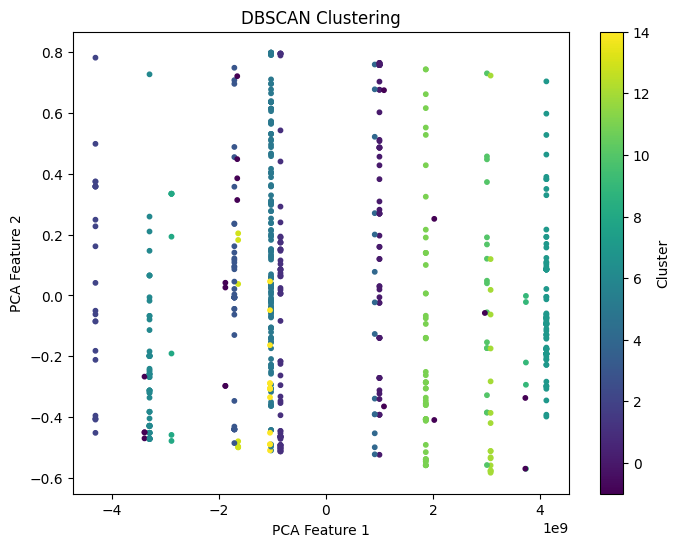

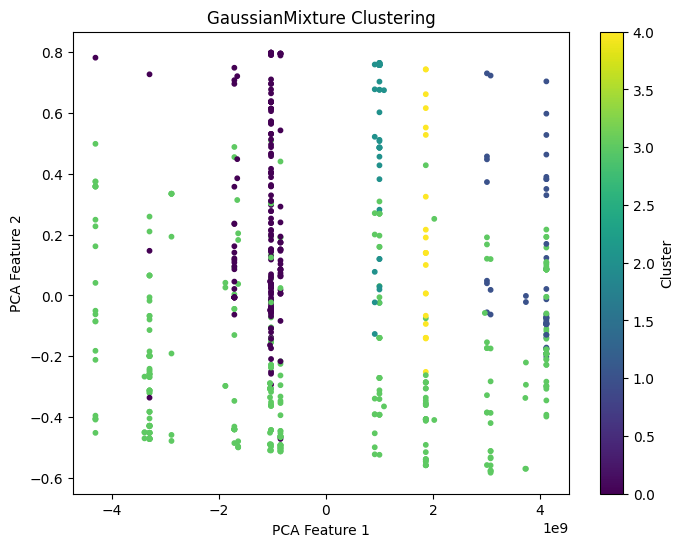

Clustering Evaluation Metrics:

KMeans:
  Silhouette Score: 0.8459
  Calinski-Harabasz Index: 8129.8588
  Davies-Bouldin Index: 0.2200

AgglomerativeClustering:
  Silhouette Score: 0.8414
  Calinski-Harabasz Index: 8393.5712
  Davies-Bouldin Index: 0.2508

DBSCAN:
  Silhouette Score: 0.9437
  Calinski-Harabasz Index: 1446.2251
  Davies-Bouldin Index: 2.3880

GaussianMixture:
  Silhouette Score: -0.0227
  Calinski-Harabasz Index: 66.0023
  Davies-Bouldin Index: 1.8670



In [17]:
# Combine required and gained skills
merged_df['skills_combined'] = merged_df['required_skill'] + " " + merged_df['gained_skill']

# Encode text features using TF-IDF
tfidf = TfidfVectorizer(max_features=100)
skills_tfidf = tfidf.fit_transform(merged_df['skills_combined']).toarray()

# Add TF-IDF features back to the dataframe
skills_df = pd.DataFrame(skills_tfidf, columns=[f'skill_tfidf_{i}' for i in range(skills_tfidf.shape[1])])
merged_df = pd.concat([merged_df.reset_index(drop=True), skills_df], axis=1)

# Encode categorical columns
le = LabelEncoder()
merged_df['school_department_encoded'] = le.fit_transform(merged_df['school_department'])
merged_df['professors_encoded'] = le.fit_transform(merged_df['professors'])

# Select numerical features for clustering
numerical_features = merged_df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(numerical_features)

# List of clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "GaussianMixture": GaussianMixture(n_components=5, random_state=42)
}

# Dictionary to store evaluation metrics
results = {}

# Apply clustering algorithms, evaluate, and save models
for name, model in clustering_algorithms.items():
    # Fit or predict clusters
    if name == "GaussianMixture":
        model.fit(numerical_features)
        clusters = model.predict(numerical_features)
    else:
        clusters = model.fit_predict(numerical_features)

    # Add cluster labels to DataFrame
    merged_df[f"{name}_cluster"] = clusters

    # Compute evaluation metrics
    silhouette_avg = silhouette_score(numerical_features, clusters) if len(set(clusters)) > 1 else np.nan
    calinski_harabasz = calinski_harabasz_score(numerical_features, clusters) if len(set(clusters)) > 1 else np.nan
    davies_bouldin = davies_bouldin_score(numerical_features, clusters) if len(set(clusters)) > 1 else np.nan

    # Store metrics in results
    results[name] = {
        "Silhouette Score": silhouette_avg,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin
    }

    # Save model
    with open(f"notebook_models/{name}_model.pkl", "wb") as file:
        pickle.dump(model, file)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(
        reduced_features[:, 0],
        reduced_features[:, 1],
        c=clusters,
        cmap="viridis",
        s=10
    )
    plt.title(f"{name} Clustering")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.colorbar(label="Cluster")
    plt.show()

# Print evaluation results
print("Clustering Evaluation Metrics:\n")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()
